<a href="https://colab.research.google.com/github/ErandySV/Simulaci-n-I/blob/main/Sistema_de_inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema de inventarios

Simulación de  un sistema de inventarios a lo largo de 12 meses

In [19]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [20]:
# Función para calcular la demanda y el número aleatorio generado
def demanda():
    # Definir los límites de los intervalos y los valores de demanda asociados
    intervalos = [
        (0.000, 0.010, 35),
        (0.010, 0.025, 36),
        (0.025, 0.045, 37),
        (0.045, 0.065, 38),
        (0.065, 0.087, 39),
        (0.087, 0.110, 40),
        (0.110, 0.135, 41),
        (0.135, 0.162, 42),
        (0.162, 0.190, 43),
        (0.190, 0.219, 44),
        (0.219, 0.254, 45),
        (0.254, 0.299, 46),
        (0.299, 0.359, 47),
        (0.359, 0.424, 48),
        (0.424, 0.494, 49),
        (0.494, 0.574, 50),
        (0.574, 0.649, 51),
        (0.649, 0.719, 52),
        (0.719, 0.784, 53),
        (0.784, 0.844, 54),
        (0.844, 0.894, 55),
        (0.894, 0.934, 56),
        (0.934, 0.964, 57),
        (0.964, 0.980, 58),
        (0.980, 0.995, 59),
        (0.995, 1.000, 60)
    ]

    # Generar un número aleatorio en el intervalo [0, 1)
    u = rnd.random()

    # Encontrar el valor de demanda correspondiente al número aleatorio generado
    for a, b, valor_demanda in intervalos:
        if a <= u < b:
            return valor_demanda, u

    # En caso extremo (u == 1.0), retornar el último valor de demanda
    return intervalos[-1][2], u

In [21]:

# Función para ajustar la demanda según el mes
def demanda_ajustada(x, mes):
    # Definir los factores de ajuste por mes
    factor_mes = [1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]

    # Validar que el mes esté dentro del rango correcto (1 a 12)
    if 1 <= mes <= len(factor_mes):
        # Aplicar el factor de ajuste correspondiente al mes
        x = round(x * factor_mes[mes - 1])

    return x


In [22]:
# Función para calcular el tiempo de entrega y estado de carga pendiente
def entrega(carga_pendiente, cont_entregas):
    v = rnd.random()
    if 0 <= v < 0.3:
        tiempo_entrega = 1
    elif 0.3 <= v < 0.7:
        tiempo_entrega = 2
    else:
        tiempo_entrega = 3
    carga_pendiente = True
    cont_entregas += 1
    return tiempo_entrega, carga_pendiente, cont_entregas

In [41]:
# Variables iniciales
inv_inicial = 150
inv_faltante = 0
carga_pendiente = False
t_entrega = 0
cont_entregas = 0
q = 200
R = 100
data = []
# Listas para almacenar datos para la gráfica
meses = []
inventario_inicial = []
inventario_final=[]

In [59]:


# Simulación de 12 meses
for m in range(12):
    mes = m + 1

    # Calcular demanda y demanda ajustada
    dem, val = demanda()
    dem_ajus = demanda_ajustada(dem, mes)

    # Calcular inventario inicial y final
    inv_final = inv_inicial - dem_ajus

    # Guardar datos para la tabla
    inv_inicial_temp = inv_inicial  # Guardamos el inventario inicial antes de cualquier modificación
    inventario_promedio = (inv_inicial_temp + inv_final) / 2  # Calculamos el inventario promedio
    if inv_final < 0:
        faltante = abs(inv_final)
        data.append([mes, inv_inicial_temp, val, dem, dem_ajus, "-", faltante, t_entrega, np.round((inv_inicial_temp ** 2) / (2 * dem_ajus))])
        inv_faltante += faltante
    else:
        data.append([mes, inv_inicial_temp, val,  dem_ajus, inv_final, 0, t_entrega, inventario_promedio])

    # Guardar datos para la gráfica
    meses.append(mes)
    inventario_inicial.append(inv_inicial)

    # Actualizar inventario inicial para el próximo mes
    inv_inicial = inv_final

    # Verificar y calcular tiempo de entrega si es necesario
    if inv_final <= R and not carga_pendiente:
        t_entrega, carga_pendiente, cont_entregas = entrega(carga_pendiente, cont_entregas)

    # Actualizar contador de recepción de entrega si hay carga pendiente
    if carga_pendiente:
        cont_entregas += 1

    # Verificar si se cumple el tiempo de entrega y ajustar inventario y estado de carga
    if cont_entregas == t_entrega:
        inv_inicial += q
        carga_pendiente = False
        t_entrega = 0
        cont_entregas = 0
        inventario_i.append(inv_inicial)



In [61]:
# Imprimir tabla usando tabulate
headers = ['Mes', 'Inventario inicial', 'Número aleatorio', 'Demanda', 'Demanda ajustada', 'Inventario final', 'Faltante', 'Orden', 'Inventario mensual promedio']
print(tabulate(data, headers=headers, tablefmt="fancy_grid", showindex=False))

╒═══════╤══════════════════════╤════════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   Número aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Orden │   Inventario mensual promedio │
╞═══════╪══════════════════════╪════════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═════════╪═══════════════════════════════╡
│     1 │                  150 │          0.377697  │        48 │                 58 │ 92                 │          0 │       0 │                           121 │
├───────┼──────────────────────┼────────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼─────────┼───────────────────────────────┤
│     2 │                   92 │          0.600559  │        51 │                 51 │ 41                 │          0 │       2 │                            66 │
├───────┼─────────────

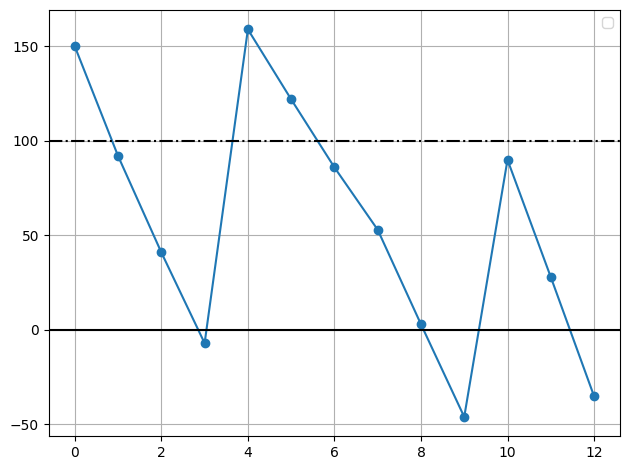

In [63]:
# Graficar el inventario inicial a lo largo de los meses
plt.plot(inventario_i, marker='o')
plt.axhline(100, color="black", linestyle='dashdot')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ahora implementaremos un algoritmo para encontrar la solución optima

En este caso, la optimización implicaría ajustar los parámetros:

*   punto de reorden (R)
*   la cantidad de pedido (q)

 para minimizar el inventario mensual promedio.

Consideraremos que el objetivo es minimizar el inventario mensual promedio para reducir costos de almacenamiento o para maximizar la eficiencia.

**Solución optima**


1.   Minimizar inventario
Calcular y optimizar la media de los inventarios iniciales de cada mes
2.    parámetros:

*   punto de reorden (R)
*   la cantidad de pedido (q)

3.   Método de optimización
4.   Validación





In [81]:
# Función para encontrar la solución óptima
def solucion_optima():
    mejor_inv = np.inf
    mejor_R = 0
    mejor_q = 0

    # Definir rangos para R y q
    for R in range(50, 151, 10):
        for q in range(100, 301, 50):
            inventario_mensual_promedio = calcular_inventario_mensual_promedio(R, q)

            if inventario_mensual_promedio < mejor_inv:
                mejor_inv = inventario_mensual_promedio
                mejor_R = R
                mejor_q = q

    return mejor_R, mejor_q, mejor_inv

# solución óptima
mejor_R, mejor_q, mejor_inv = solucion_optima()




In [84]:
# Imprimir resultados
print("Solución optima encontrada:")
print(f" R : {mejor_R}")
print(f" q : {mejor_q}")
print(f"inventario: {mejor_inv}")

Solución optima encontrada:
 R : 120
 q : 100
inventario: -139.375
